In [13]:
###################################################################################################
# Project: 
#          
# Lenguaje: Python / jupyter
# Description:
#
# References: 
# Git Control:
# Author : Sahenjit Paul - Camilo Blanco Vargas - Year: 2021 
# Mail shanks.p.95@gmail.com -:mail@camiloblanco.com 
###################################################################################################

In [14]:
# Import the necesary libraries
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import timedelta
import Oanda_Manager as om

In [15]:
# Create an Oanda_Manager object to connect to Oanda API
Account_details_file = 'Account_details.csv'
oandaAcc =  om.Oanda_Manager(Account_details_file)
print(oandaAcc.account_list())

(200, {'accounts': [{'id': '101-004-19105515-001', 'tags': []}]})


In [16]:
# Retrieve the index data as a time-series dataframe usign a date range
#https://developer.oanda.com/rest-live-v20/instrument-df/#CandlestickGranularity
asset_name="SPX500_USD"
#granularity="H4"
granularity="H4"
from_date = pd.to_datetime('1/1/2003')
to_date  = pd.to_datetime('12/31/2003')
candle_data = oandaAcc.get_candles_dates(asset_name, granularity,from_date,to_date)
candle_data.head()

,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c
time,,,,,,,,,,,,,
2003-03-21 18:00:00,195.0,892.8,897.0,886.0,895.3,892.8,897.0,886.0,895.3,892.8,897.0,886.0,895.3
2003-03-24 06:00:00,182.0,882.7,883.2,877.4,879.4,882.7,883.2,877.4,879.4,882.7,883.2,877.4,879.4
2003-03-24 10:00:00,208.0,879.9,881.0,877.7,877.9,879.9,881.0,877.7,877.9,879.9,881.0,877.7,877.9
2003-03-24 14:00:00,238.0,878.2,878.9,866.2,867.9,878.2,878.9,866.2,867.9,878.2,878.9,866.2,867.9
2003-03-24 18:00:00,195.0,868.2,869.7,861.9,864.4,868.2,869.7,861.9,864.4,868.2,869.7,861.9,864.4


In [17]:
# Print the info of the resulting timeIndex dataframe
candle_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1038 entries, 2003-03-21 18:00:00 to 2003-12-30 22:00:00
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   volume  1038 non-null   float64
 1   mid_o   1038 non-null   float64
 2   mid_h   1038 non-null   float64
 3   mid_l   1038 non-null   float64
 4   mid_c   1038 non-null   float64
 5   bid_o   1038 non-null   float64
 6   bid_h   1038 non-null   float64
 7   bid_l   1038 non-null   float64
 8   bid_c   1038 non-null   float64
 9   ask_o   1038 non-null   float64
 10  ask_h   1038 non-null   float64
 11  ask_l   1038 non-null   float64
 12  ask_c   1038 non-null   float64
dtypes: float64(13)
memory usage: 113.5 KB


In [18]:
# Describe the date
index_stats = candle_data.describe()
index_stats = index_stats.transpose()
index_stats

,count,mean,std,min,25%,50%,75%,max
volume,1038.0,1278.173410,1945.243005,1.0,110.250,214.00,1375.000,7891.0
mid_o,1038.0,1001.225337,56.161332,847.5,980.400,1003.70,1043.675,1110.7
mid_h,1038.0,1003.861079,55.579980,853.5,983.425,1006.70,1045.875,1111.7
mid_l,1038.0,998.582370,56.717581,843.3,977.700,1001.35,1041.975,1110.2
mid_c,1038.0,1001.401927,56.193654,845.5,980.525,1003.60,1043.975,1111.2
bid_o,1038.0,1001.225337,56.161332,847.5,980.400,1003.70,1043.675,1110.7
bid_h,1038.0,1003.861079,55.579980,853.5,983.425,1006.70,1045.875,1111.7
bid_l,1038.0,998.582370,56.717581,843.3,977.700,1001.35,1041.975,1110.2
bid_c,1038.0,1001.401927,56.193654,845.5,980.525,1003.60,1043.975,1111.2
ask_o,1038.0,1001.225337,56.161332,847.5,980.400,1003.70,1043.675,1110.7


<AxesSubplot:xlabel='time'>

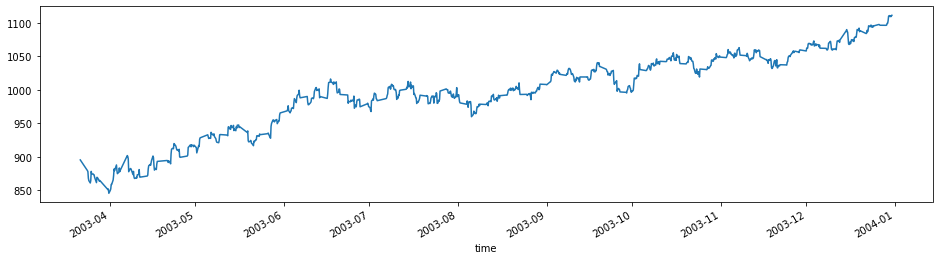

In [19]:
# Plot the medium closing price
plt.figure(figsize=(16,4))
candle_data['mid_c'].plot()

In [22]:
sp500_data = go.Scatter(x=candle_data.index, y=candle_data['mid_c'])
layout = go.Layout(title='Price Plot', xaxis=dict(title='Date'), yaxis=dict(title='price'))
fig = go.Figure(data=[sp500_data], layout=layout)
fig.show()

In [23]:
from_date = pd.to_datetime('1-1-2003')
to_date  = pd.to_datetime('12/31/2003')
to_date - from_date

Timedelta('364 days 00:00:00')

In [24]:
from_date+ timedelta(days=200)

Timestamp('2003-07-20 00:00:00')

In [25]:
granularity="H4"
from_date = pd.to_datetime('1/1/2003')
to_date  = pd.to_datetime('12/31/2003')
candle_data_2003 = oandaAcc.get_candles_dates(asset_name, granularity,from_date,to_date)
from_date = pd.to_datetime('1/1/2004')
to_date  = pd.to_datetime('12/31/2004')
candle_data_2004 = oandaAcc.get_candles_dates(asset_name, granularity,from_date,to_date)
from_date = pd.to_datetime('1/1/2005')
to_date  = pd.to_datetime('12/31/2005')
candle_data_2005 = oandaAcc.get_candles_dates(asset_name, granularity,from_date,to_date)
from_date = pd.to_datetime('1/1/2006')
to_date  = pd.to_datetime('12/31/2006')
candle_data_2006 = oandaAcc.get_candles_dates(asset_name, granularity,from_date,to_date)
from_date = pd.to_datetime('1/1/2007')
to_date  = pd.to_datetime('12/31/2007')
candle_data_2007 = oandaAcc.get_candles_dates(asset_name, granularity,from_date,to_date)
candle_data_2003_2007 = pd.concat([candle_data_2003,candle_data_2004,candle_data_2005,candle_data_2006,candle_data_2007])


In [26]:
candle_data_2003_2007.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7162 entries, 2003-03-21 18:00:00 to 2007-12-30 22:00:00
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   volume  7162 non-null   float64
 1   mid_o   7162 non-null   float64
 2   mid_h   7162 non-null   float64
 3   mid_l   7162 non-null   float64
 4   mid_c   7162 non-null   float64
 5   bid_o   7162 non-null   float64
 6   bid_h   7162 non-null   float64
 7   bid_l   7162 non-null   float64
 8   bid_c   7162 non-null   float64
 9   ask_o   7162 non-null   float64
 10  ask_h   7162 non-null   float64
 11  ask_l   7162 non-null   float64
 12  ask_c   7162 non-null   float64
dtypes: float64(13)
memory usage: 783.3 KB


In [ ]:
sp500_data = go.Scatter(x=candle_data_2003_2007.index, y=candle_data_2003_2007['mid_c'])
layout = go.Layout(title='Price Plot', xaxis=dict(title='Date'), yaxis=dict(title='price'))
fig = go.Figure(data=[sp500_data], layout=layout)
fig.show()